In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFFF", "FHHH", "FFFF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False) 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    if old_avg == 0:
        return 100
    else:
        return (avg_change / old_avg) * 100

In [4]:
def runTrial():
    # Define parameters
    gamma = 0.9  # Discount factor
    alpha = 0.1  # Learning rate
    epsilon = 0.01  # Epsilon-greedy parameter
    num_episodes = 100

    # Initialize Q-values
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))

    statistics = pd.DataFrame({
        "Time": [],
        "Episode": [],
        "Q-Difference": [],
        "GotGift": []
    })

    # SARSA
    start_time = time.time()

    timeToConverge = 0
    
    episode = 0
    loop=True
    while loop:
        state = env.reset()[0]
        done = False

        gotGift = False

        steps = []

        arr_copy = Q.copy()

        # Choose initial action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Random action
        else:
            action = np.argmax(Q[state])  # Greedy action

        while not done:


            # Take action and observe next state and reward
            steps.append(action)
            step = env.step(action)
            next_state = step[0]
            reward = step[1]
            done = step[2]

            if reward == 0 and done:
                reward = -1
            elif next_state == state:
                reward = -1

            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()  # Random action
            else:
                next_action = np.argmax(Q[next_state])  # Greedy action

            # SARSA update rule
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            if reward == 1:
#                 print("Hit gift! At Episode: "+str(episode +1))
    #             print(Q)
    #             print("Steps: ")
    #             print(steps)
                gotGift = True
                end_time = time.time()
                elapsed_time = end_time - start_time
#                 print("Elapsed time:", elapsed_time, "seconds")


            # Move to next state
            state = next_state
            action = next_action

        change = calculate_percentage_change(arr_copy, Q)
        end_time = time.time()
        elapsed_time = end_time - start_time

        statistics.loc[episode] = {
            "Time": elapsed_time,
            "Episode": episode+1,
            "Q-Difference": -change,
            "GotGift": gotGift
        }

        if -change <= 0.1 and gotGift:
            loop=False
#             print("Final time: "+str(elapsed_time))
#             print(change)
            timeToConverge = elapsed_time
        episode += 1

    # Optimal policy
    optimal_policy = np.argmax(Q, axis=1)

#     print("Optimal policy:")
#     print(optimal_policy)
    
    # Create the scatter plot
    sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

    # Set the limits of x and y axes
    plt.ylim(0, 100)
    # Show the plot
    plt.show()
    
    return timeToConverge


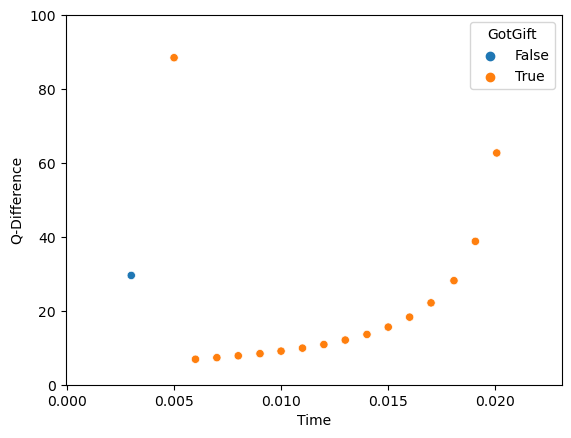

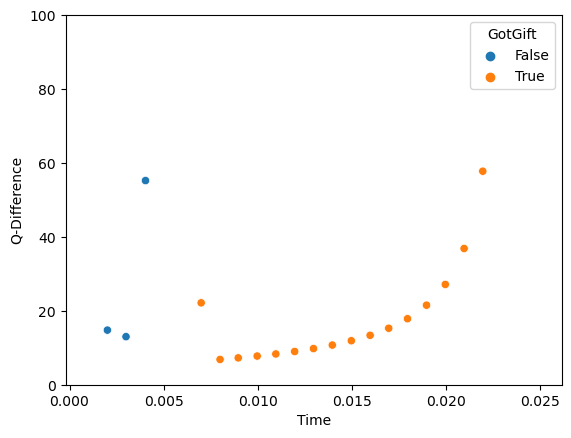

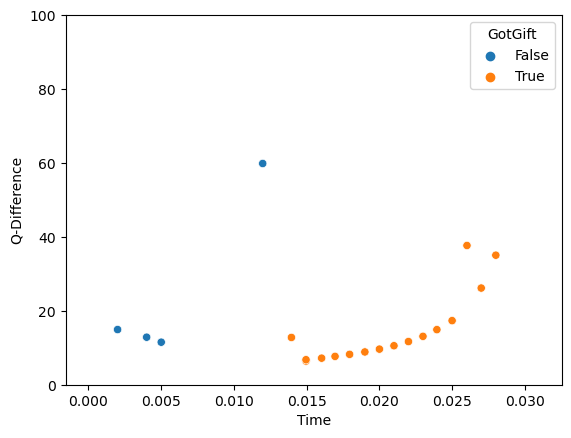

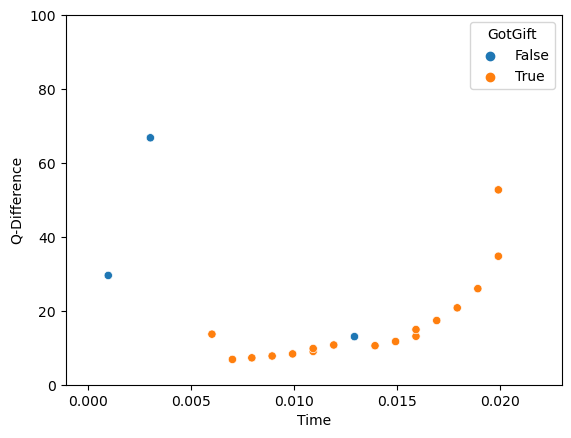

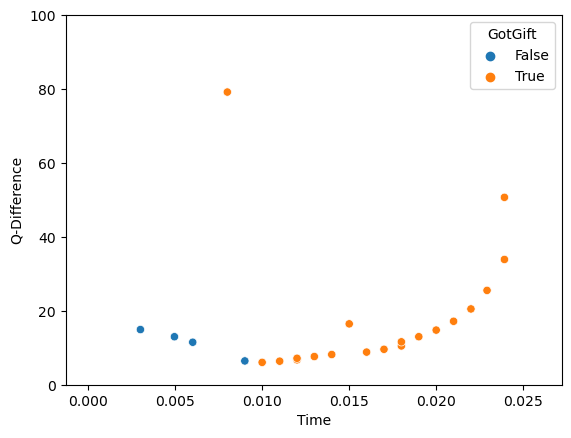

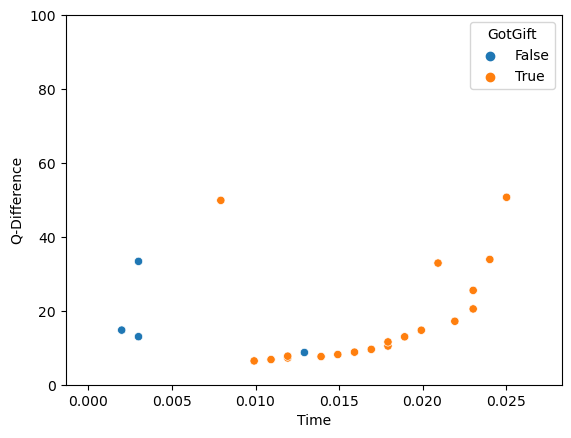

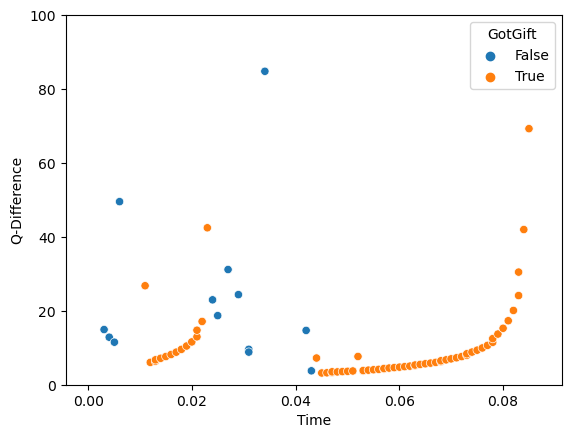

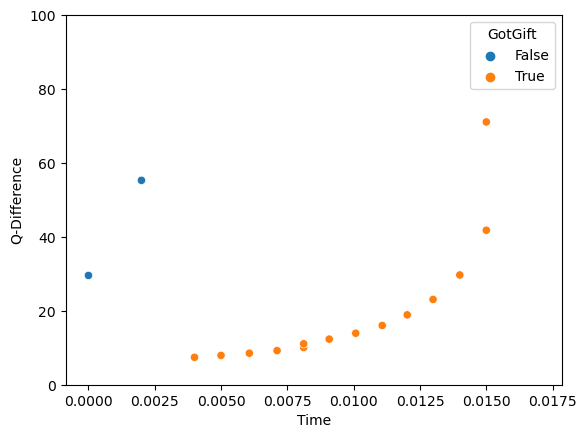

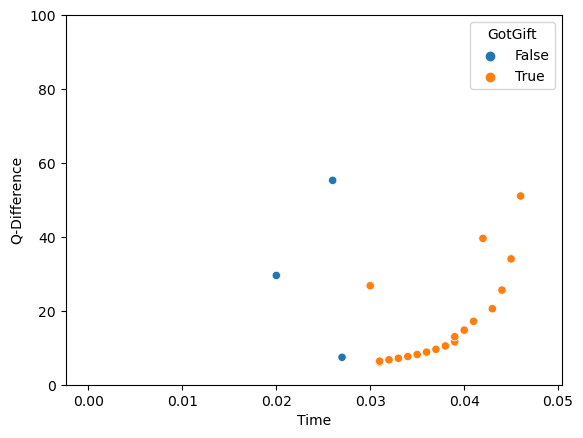

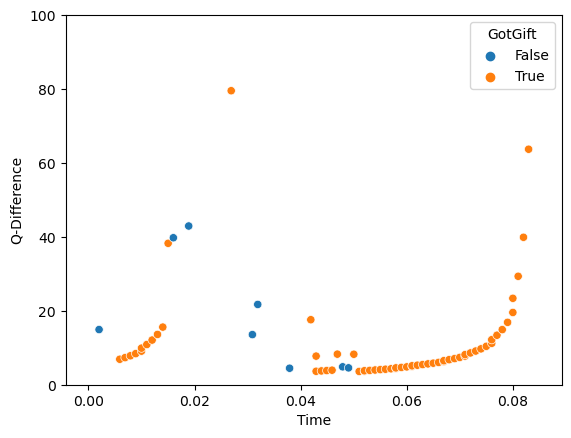

   Trial      Time
0      1  0.022069
1      2  0.024976
2      3  0.031003
3      4  0.021929
4      5  0.025923
5      6  0.026991
6      7  0.087005
7      8  0.016998
8      9  0.048008
9     10  0.084960


In [5]:
trialTimes = pd.DataFrame(
    {
        "Trial": [],
        "Time": []
    }
)

for i in range(10):
    tim = runTrial()
    trialTimes.loc[i] = {
        "Trial": i+1,
        "Time": tim
    }
    
print(trialTimes)

In [6]:
trialTimes

,Trial,Time
0,1,0.022069
1,2,0.024976
2,3,0.031003
3,4,0.021929
4,5,0.025923
5,6,0.026991
6,7,0.087005
7,8,0.016998
8,9,0.048008
9,10,0.084960


In [7]:
trialTimes['Time'].mean()

0.03898622989654541